In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('Diwali Sales Data.csv')
df.shape

(11251, 15)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra†Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
# drop unrelated/ blank columns
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [11]:
# check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.shape

(11251, 13)

In [15]:
# drop null values
df.dropna(inplace=True)

In [16]:
df.shape

(11239, 13)

In [17]:
# change data type
df['Amount']= df['Amount'].astype('int')

In [18]:
df['Amount'].dtypes

dtype('int64')

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [22]:
# rename column
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra†Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [24]:
# describe specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**EXPLORATORY DATA ANALYSIS**

GENDER

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

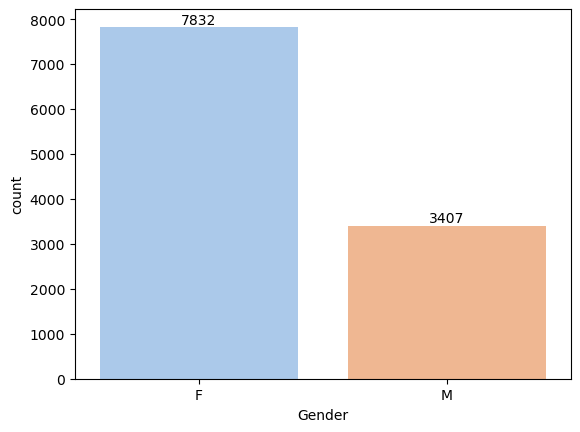

In [34]:
ax = sns.countplot(x='Gender',hue='Gender', data = df, palette='pastel', legend=False)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

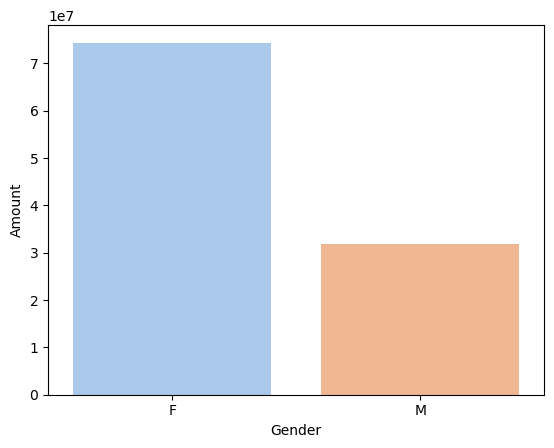

In [41]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', hue='Gender', data=sales_gen, palette='pastel', legend=False)

From the above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.

**AGE**

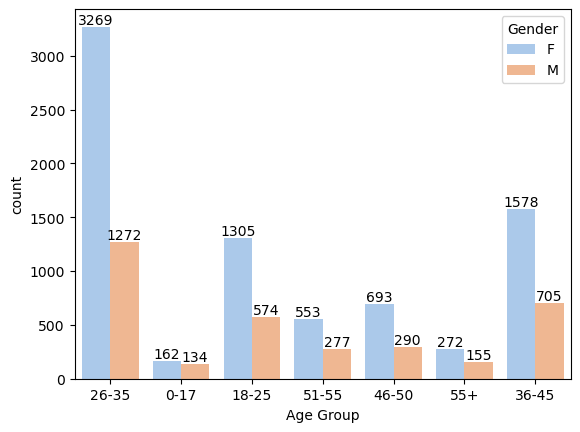

In [48]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender', palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

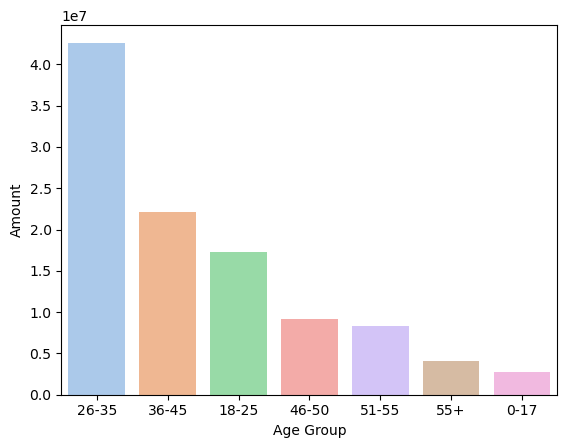

In [45]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', hue='Age Group', data=sales_age, palette='pastel', legend=False)

From the above graphs, we can infer that most of the buyers fall in the age group between 26-35 years female.

**STATE**

In [49]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

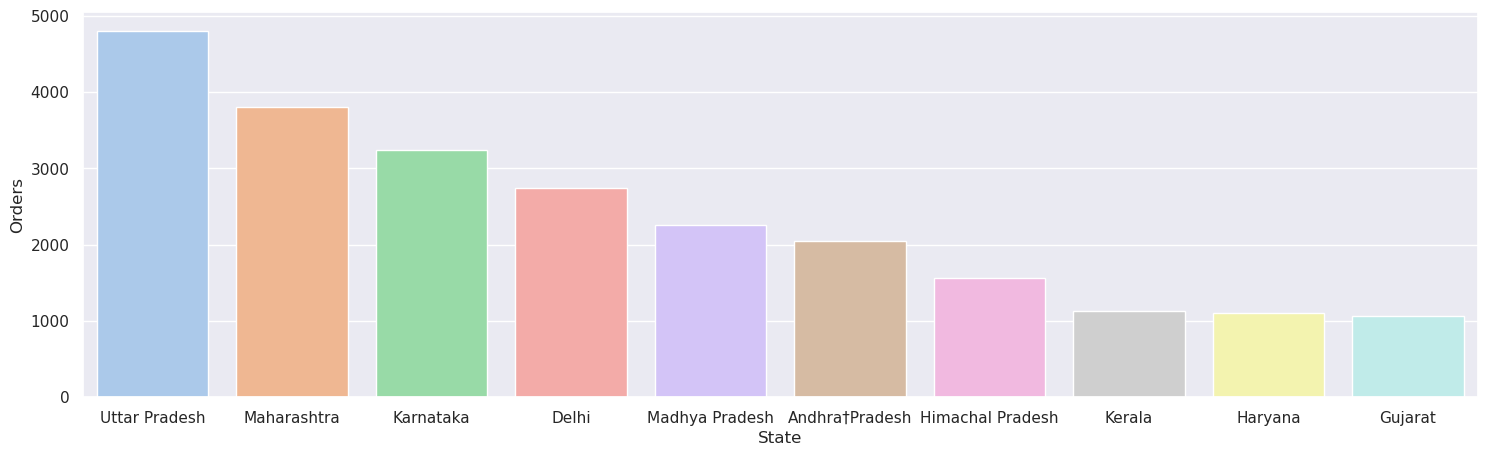

In [57]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc=({'figure.figsize':(18,5)}))
sns.barplot(data=sales_state, x='State', y='Orders',hue='State', palette='pastel')

<Axes: xlabel='State', ylabel='Amount'>

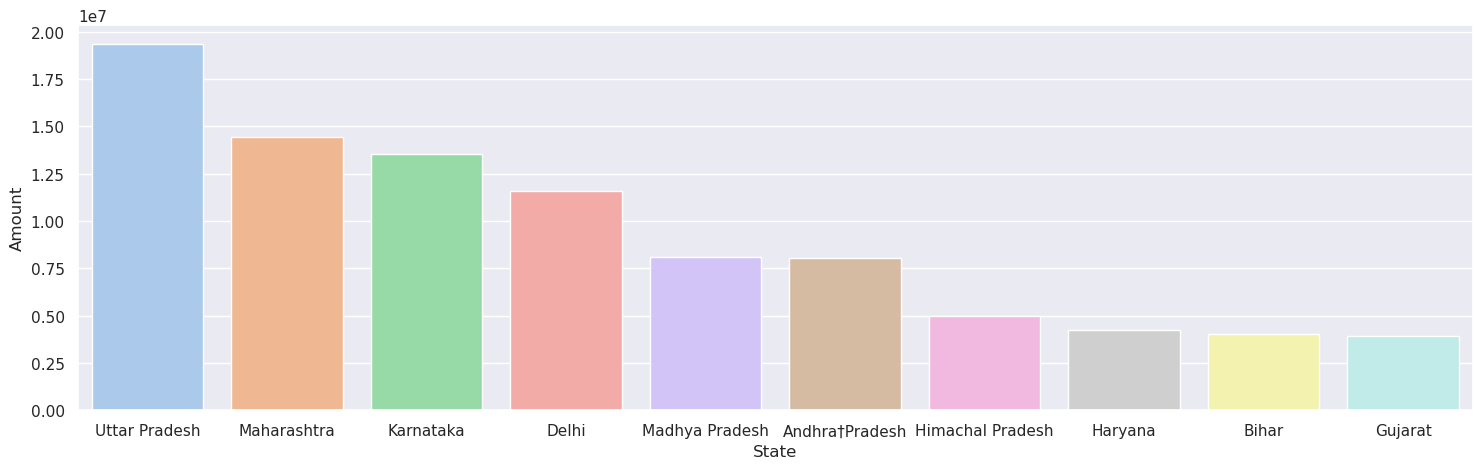

In [58]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc=({'figure.figsize':(18,5)}))
sns.barplot(data=sales_state, x='State', y='Amount ',hue='State', palette='pastel')

From the above graphs we can infer that most of the orders are from UP, Maharashtra and Karnataka.

**Marital Status**

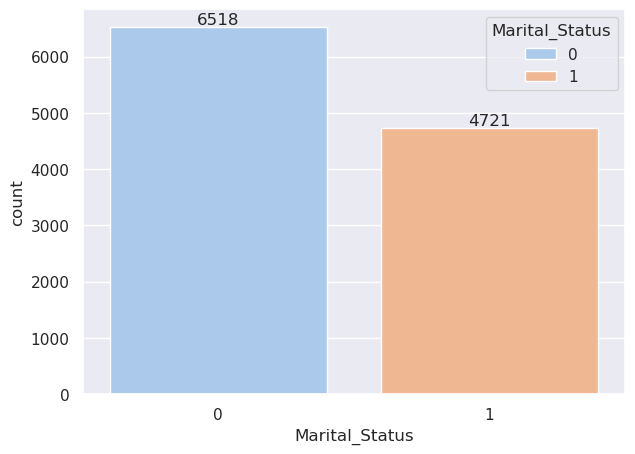

In [64]:
ax = sns.countplot(data=df, x='Marital_Status', hue='Marital_Status', palette='pastel')

sns.set(rc={'figure.figsize':(7,10)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

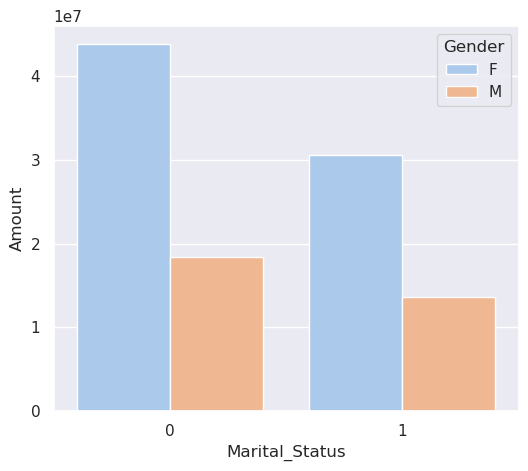

In [68]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc=({'figure.figsize':(6,5)}))
sns.barplot(data=sales_state, x='Marital_Status', y='Amount',hue='Gender', palette='pastel')

From above graphs we can infer that most of the buyers that are married are women with high purchasing power.

**OCCUPATION**

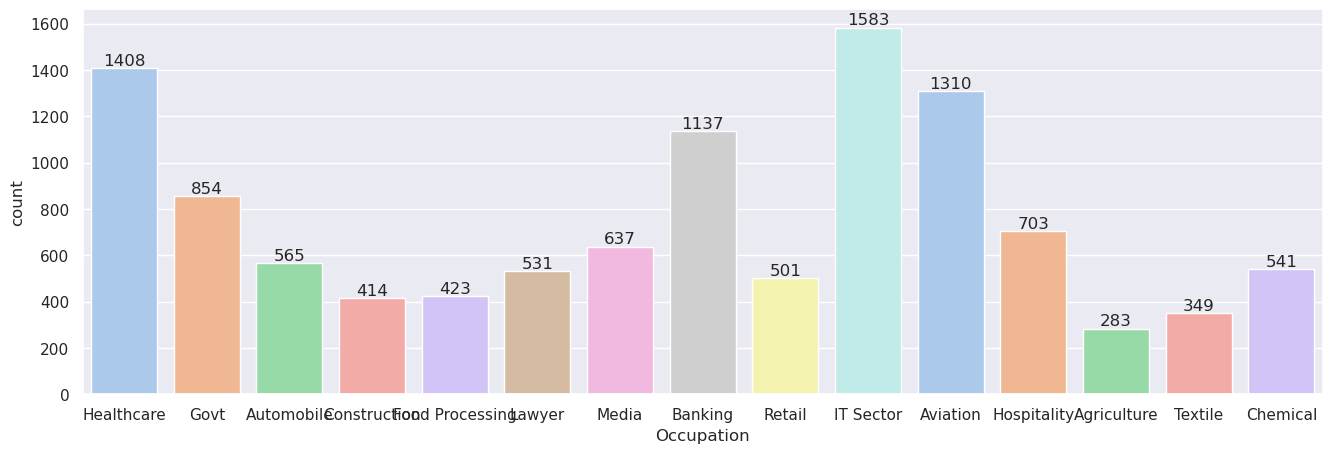

In [74]:
ax = sns.countplot(data=df, x='Occupation', hue='Occupation', palette='pastel')

sns.set(rc={'figure.figsize':(30,7)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

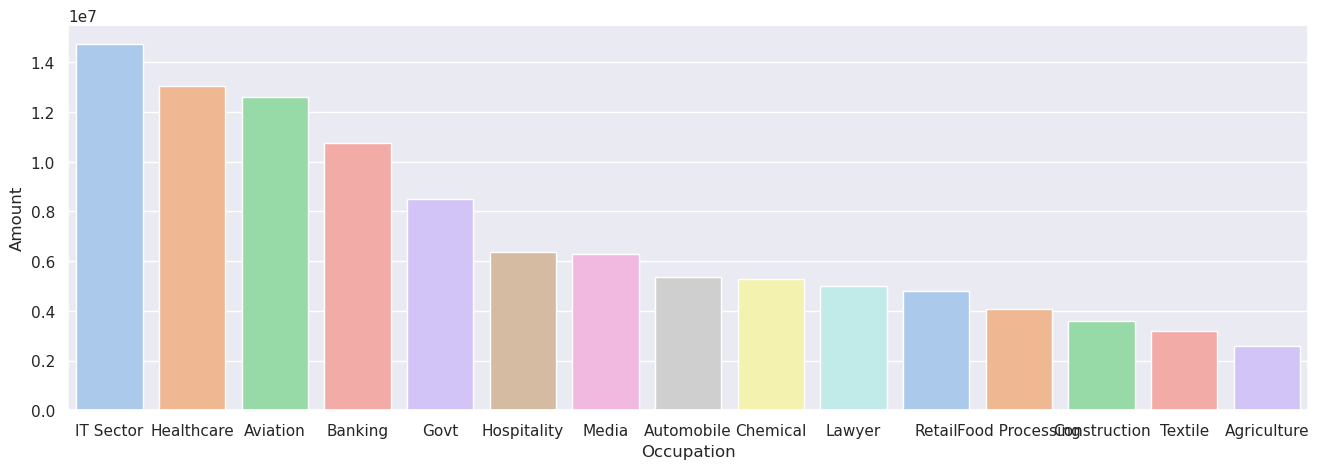

In [73]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc=({'figure.figsize':(16,5)}))
sns.barplot(data=sales_state, x='Occupation', y='Amount',hue='Occupation', palette='pastel')

From above graphs we can infer that most of the buyers are working in IT, Aviation and Healthcare sector.

**PRODUCT CATEGORY**

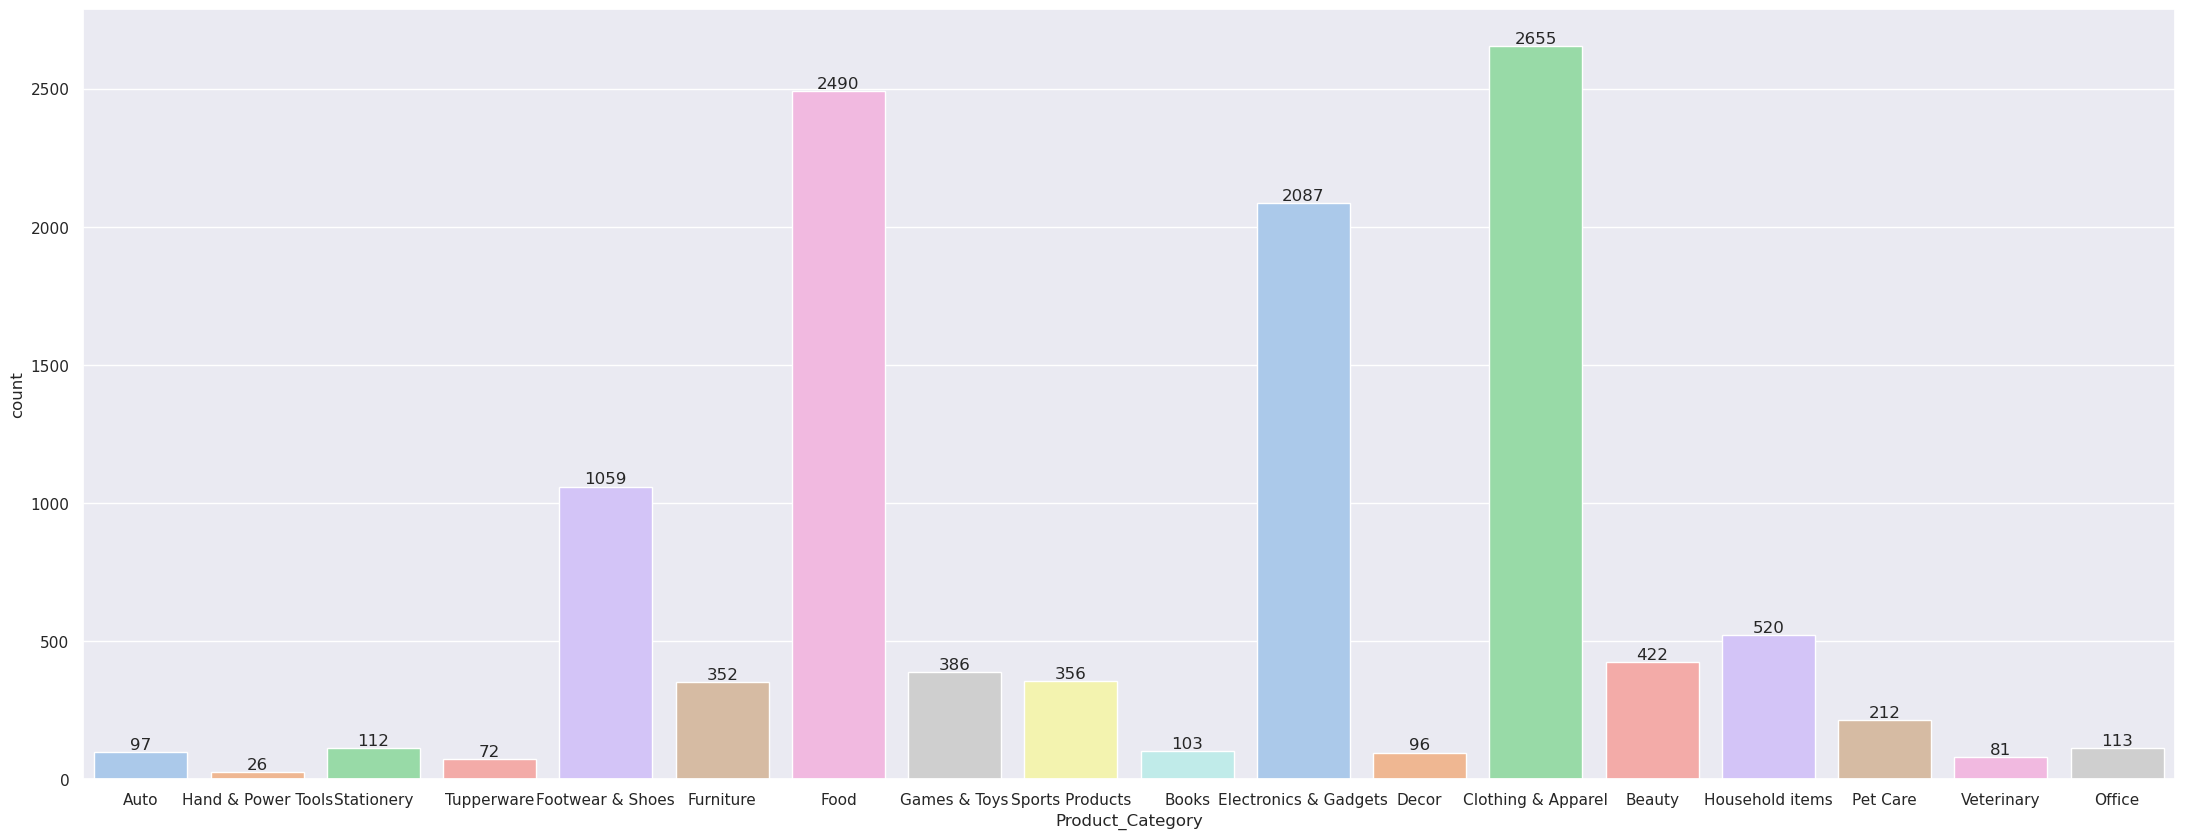

In [77]:
ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category', palette='pastel')

sns.set(rc={'figure.figsize':(27,15)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

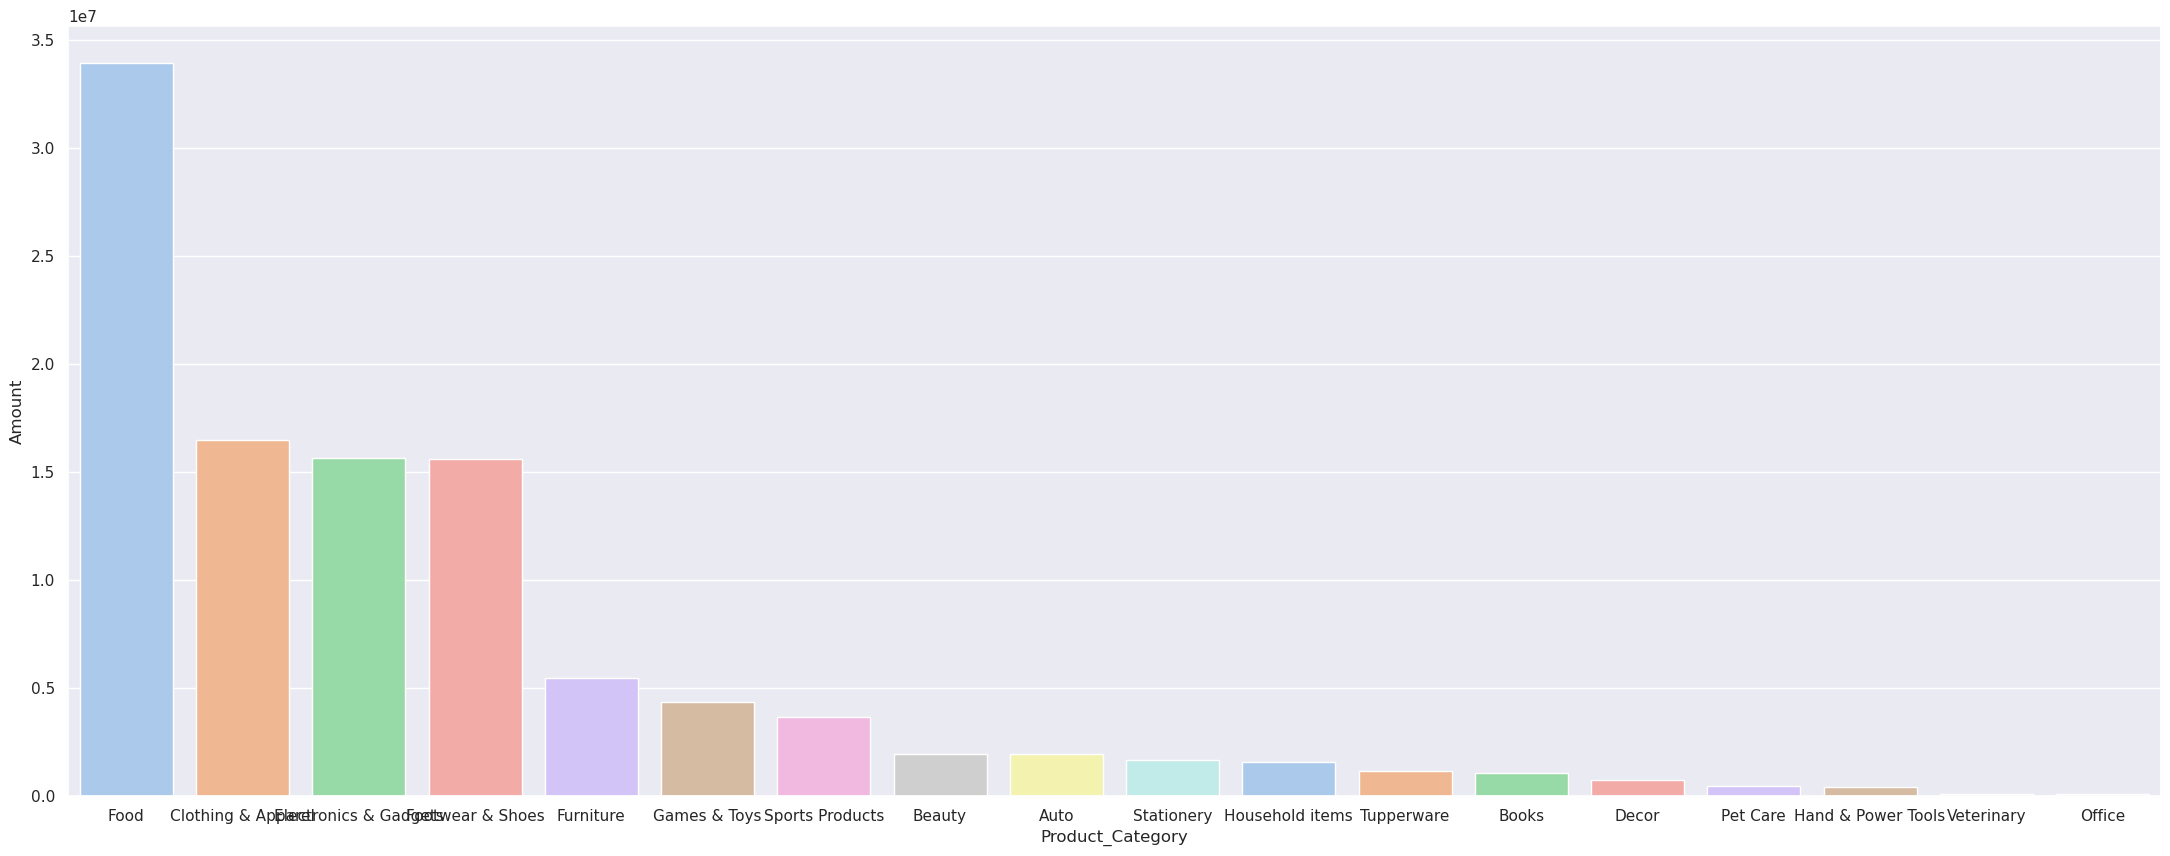

In [80]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc=({'figure.figsize':(27,10)}))
sns.barplot(data=sales_state, x='Product_Category', y='Amount',hue='Product_Category', palette='pastel')

From the above graphs we can infer that most of the products sold are from the Food, Footwear and Electronice Category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

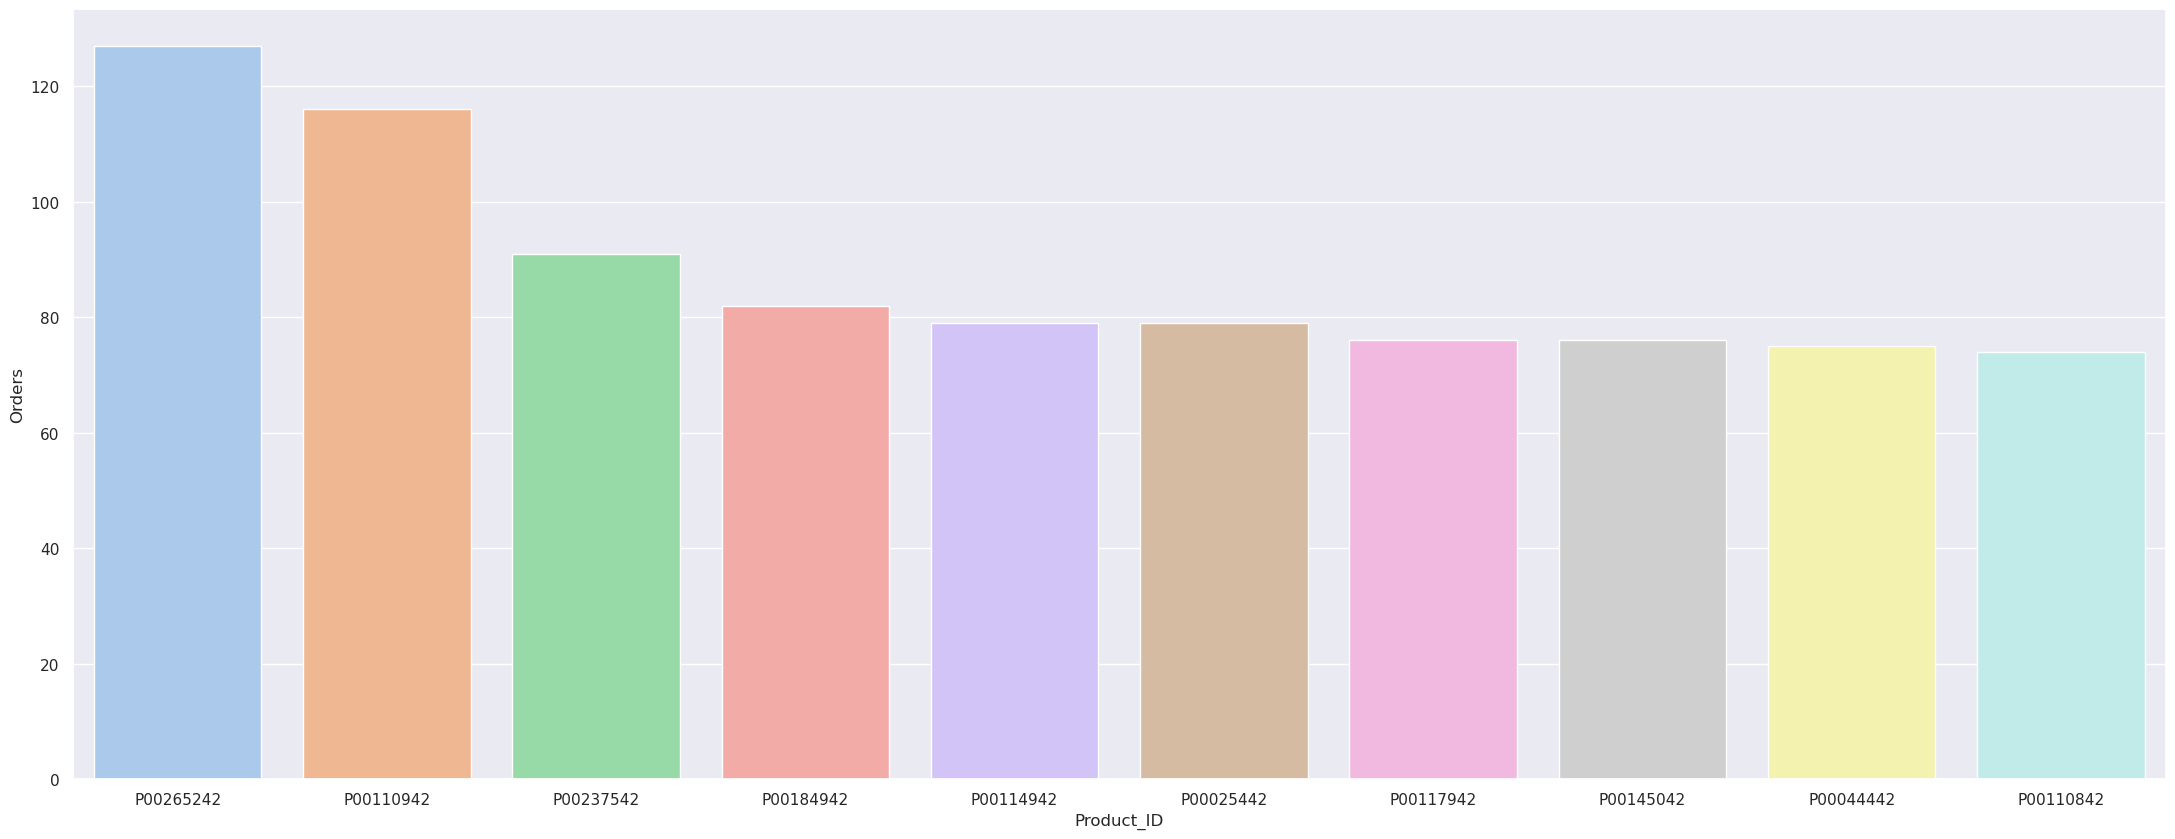

In [81]:
# top 10 most sold products 
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc=({'figure.figsize':(27,10)}))
sns.barplot(data=sales_state, x='Product_ID', y='Orders',hue='Product_ID', palette='pastel')

**CONCLUSION** 
Married women in the age group 26-35 years from UP, Maharashtra, Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics Category during Diwali.